In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max_rows', None)

In [28]:
app=pd.read_csv('application_data.csv')
prev=pd.read_csv('previous_application.csv')


In [29]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
nrows=app.shape[0]
ncols=app.shape[1]

In [103]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [49]:
object_columns = app.select_dtypes(include=['object']).columns
print(object_columns)   #these are columns of object/string type 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [53]:
app[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].head()
#These are the columns of string type, most of them are categorical.

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [104]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [32]:
# Null value analysis

In [33]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [126]:
(app.isna().sum() / nrows).sort_values(ascending=False).head(50)

COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

<Axes: >

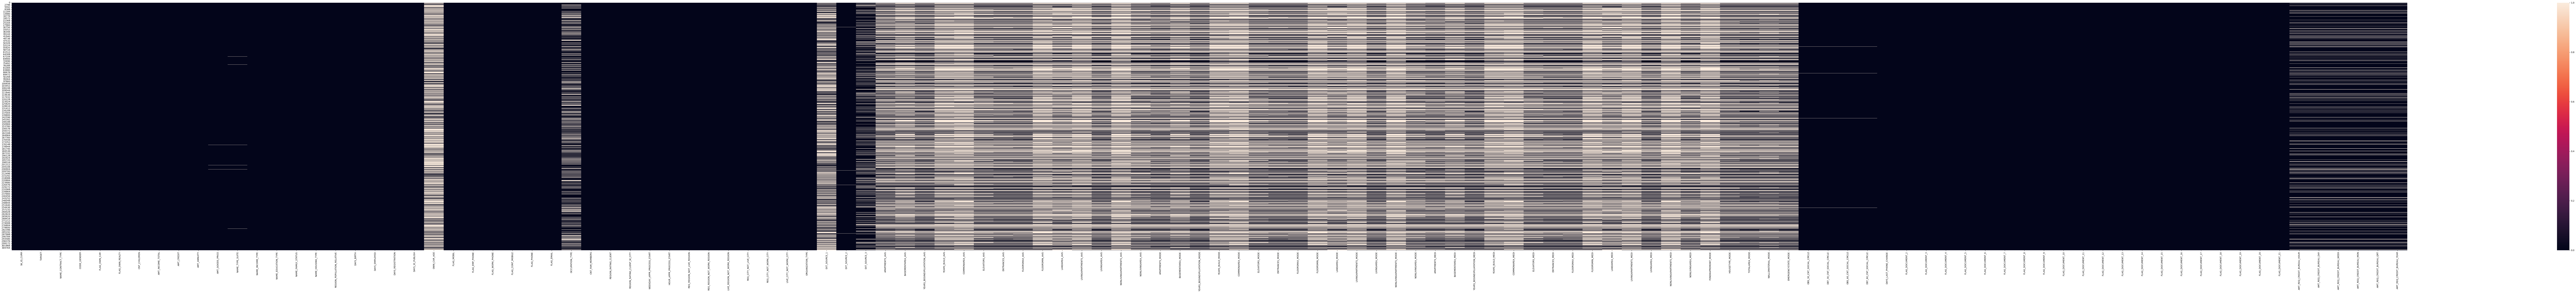

In [41]:
plt.figure(figsize=(240,20))
sns.heatmap(app.isna())   #This heatmap is used to visualize the proportion of null values in the entire dataset and 
#it also helps to visually see the amount/percentage of null values in various columns

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
dtype: float64

In [ ]:
sns.histplot(app['COMMONAREA_AVG'])

(0.0, 0.2)

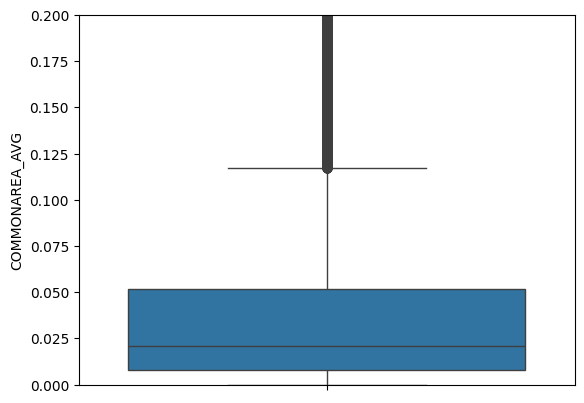

In [73]:
sns.boxplot(app['COMMONAREA_AVG'])
plt.ylim([0,0.2])

In [65]:
np.median(app['COMMONAREA_AVG'].dropna())

np.float64(0.0211)

In [85]:
np.mean(app['COMMONAREA_AVG'].dropna())

np.float64(0.044620715411350736)

In [ ]:
app['TARGET'].value_counts()

<Axes: xlabel='TARGET', ylabel='count'>

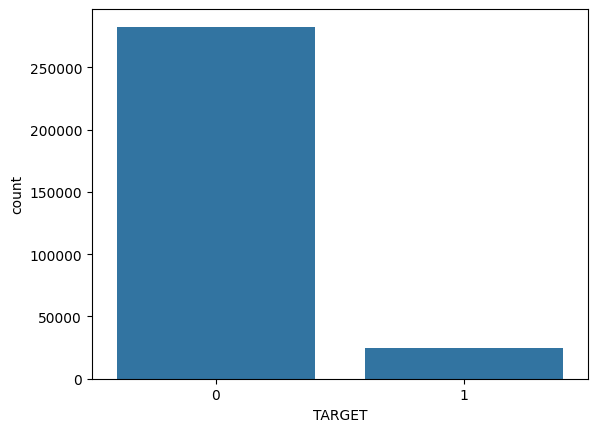

In [158]:
sns.countplot(data=app,x='TARGET')

(0.0, 0.5)

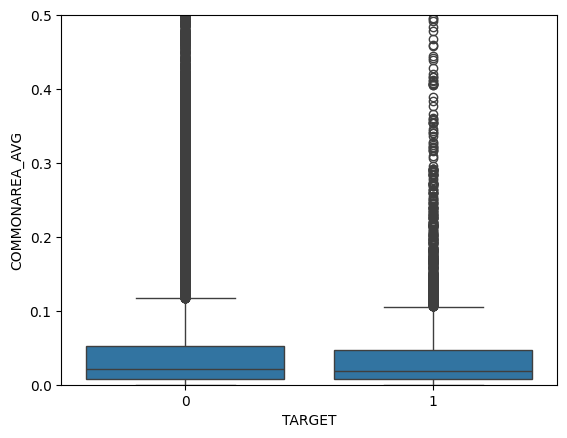

In [86]:
sns.boxplot(data=app,y=app['COMMONAREA_AVG'].dropna(),x='TARGET')
plt.ylim([0,0.5])

The above boxplot shows that for the target variable, the values of 'COMMONAREA_AVG' give the nearly same output(of 0 and 1). So this column will not help a lot in differentiating between a 0 target value and a 1 target value. Hence we drop this column. Same is the case with 'COMMONAREA_MODE' and 'COMMONAREA_MEDI' column

(0.0, 0.5)

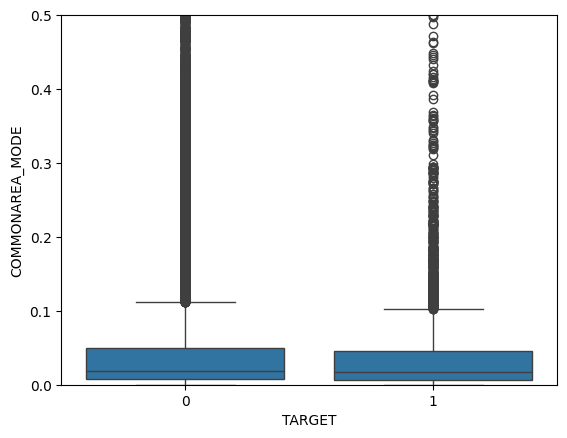

In [91]:
sns.boxplot(data=app,y=app['COMMONAREA_MODE'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.5)

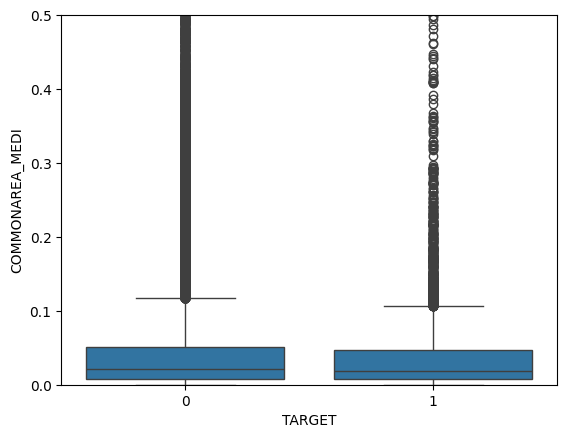

In [92]:
sns.boxplot(data=app,y=app['COMMONAREA_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.5])

(0.0, 0.01)

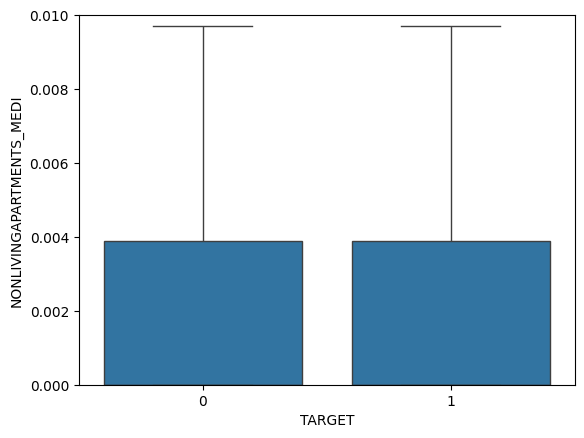

In [125]:
sns.boxplot(data=app,y=app['NONLIVINGAPARTMENTS_MEDI'].dropna(),x='TARGET')
plt.ylim([0,0.01])

<Axes: xlabel='TARGET', ylabel='FONDKAPREMONT_MODE'>

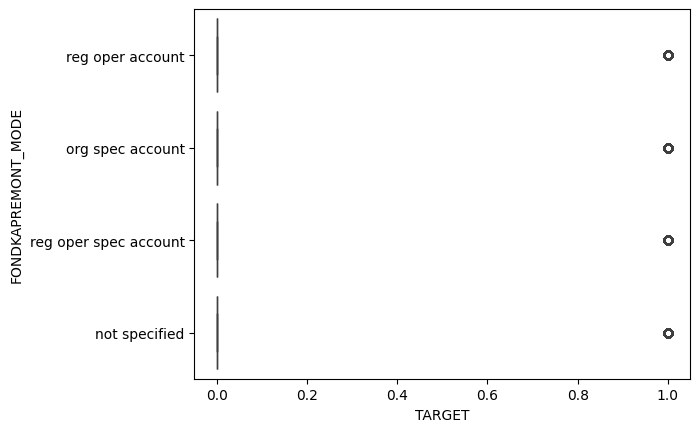

In [122]:
sns.boxplot(data=app,y=app['FONDKAPREMONT_MODE'].dropna(),x='TARGET')
#check

In [98]:
app['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [105]:
app['FONDKAPREMONT_MODE'].dropna().head()

0     reg oper account
1     reg oper account
12    reg oper account
13    reg oper account
14    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object

In [ ]:
sns.barplot(data=app,y=app['FONDKAPREMONT_MODE'].dropna(),x='TARGET')


(0.0, 0.3)

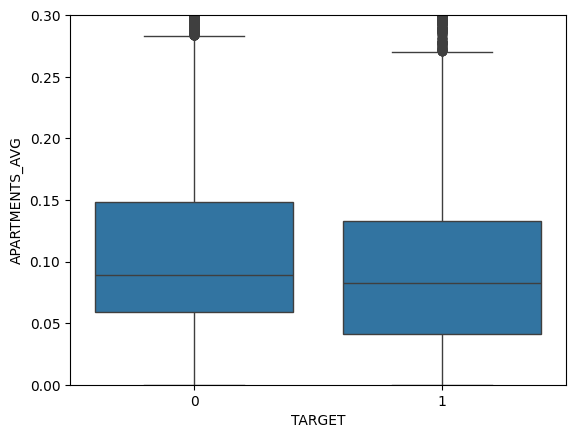

In [124]:
sns.boxplot(data=app,y=app['APARTMENTS_AVG'].dropna(),x='TARGET')
plt.ylim([0,.3])

(0.0, 23.0)

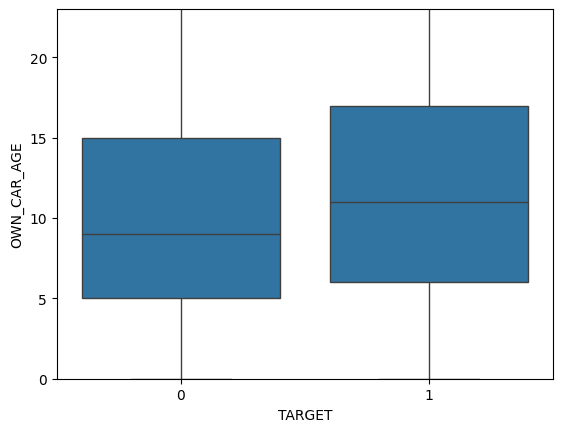

In [129]:
sns.boxplot(data=app,y=app['OWN_CAR_AGE'].dropna(),x='TARGET')
plt.ylim([0,23])

(0.9, 1.0)

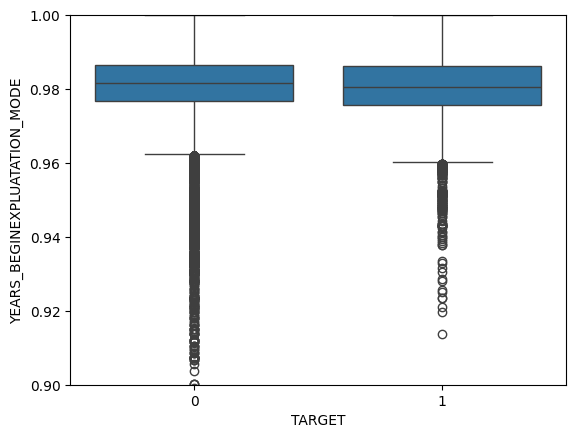

In [154]:
sns.boxplot(data=app,y=app['YEARS_BEGINEXPLUATATION_MODE'].dropna(),x='TARGET')
plt.ylim([0.9,1])

In [137]:
obj_cols_app=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [ ]:
# COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE COMMONAREA_AVG                  0.698723
# COMMONAREA_MODE                 0.698723
# COMMONAREA_MEDI                 0.698723
# NONLIVINGAPARTMENTS_MEDI        0.694330
# NONLIVINGAPARTMENTS_MODE        0.694330
# NONLIVINGAPARTMENTS_AVG         0.694330
# FONDKAPREMONT_MODE              0.683862
# LIVINGAPARTMENTS_AVG            0.683550
# LIVINGAPARTMENTS_MEDI           0.683550
# LIVINGAPARTMENTS_MODE           0.683550
# FLOORSMIN_MODE                  0.678486
# FLOORSMIN_AVG                   0.678486
# FLOORSMIN_MEDI                  0.678486
# YEARS_BUILD_AVG                 0.664978
# YEARS_BUILD_MODE                0.664978
# YEARS_BUILD_MEDI                0.664978
# OWN_CAR_AGE                     0.659908
# LANDAREA_MEDI                   0.593767
# LANDAREA_AVG                    0.593767
# LANDAREA_MODE                   0.593767
# BASEMENTAREA_MODE               0.585160
# BASEMENTAREA_MEDI               0.585160
# BASEMENTAREA_AVG                0.585160
# EXT_SOURCE_1                    0.563811
# NONLIVINGAREA_MODE              0.551792
# NONLIVINGAREA_AVG               0.551792
# NONLIVINGAREA_MEDI              0.551792
# ELEVATORS_AVG                   0.532960
# ELEVATORS_MEDI                  0.532960
# ELEVATORS_MODE                  0.532960
# WALLSMATERIAL_MODE              0.508408
# APARTMENTS_AVG                  0.507497
# APARTMENTS_MEDI                 0.507497
# APARTMENTS_MODE                 0.507497
# ENTRANCES_MODE                  0.503488
# ENTRANCES_MEDI                  0.503488
# ENTRANCES_AVG                   0.503488
# LIVINGAREA_AVG                  0.501933
# LIVINGAREA_MEDI                 0.501933
# LIVINGAREA_MODE                 0.501933
# HOUSETYPE_MODE                  0.501761
# FLOORSMAX_MODE                  0.497608
# FLOORSMAX_AVG                   0.497608
# FLOORSMAX_MEDI                  0.497608
# YEARS_BEGINEXPLUATATION_MODE    0.487810
# YEARS_BEGINEXPLUATATION_MEDI    0.487810
# YEARS_BEGINEXPLUATATION_AVG     0.487810
# TOTALAREA_MODE                  0.482685
# EMERGENCYSTATE_MODE             0.473983
# OCCUPATION_TYPE 

In [106]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [108]:
prev.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [117]:
prev.shape[0]

1670214

In [118]:
(prev.isna().sum() / prev.shape[0]).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
DAYS_TERMINATION               4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
SK_ID_PREV                     0.000000e+00
AMT_APPLICATION                0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
SK_ID_CURR                     0.000000e+00
WEEKDAY_APPR_PROCESS_START     0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_PAYMENT_TYPE              0

<Axes: >

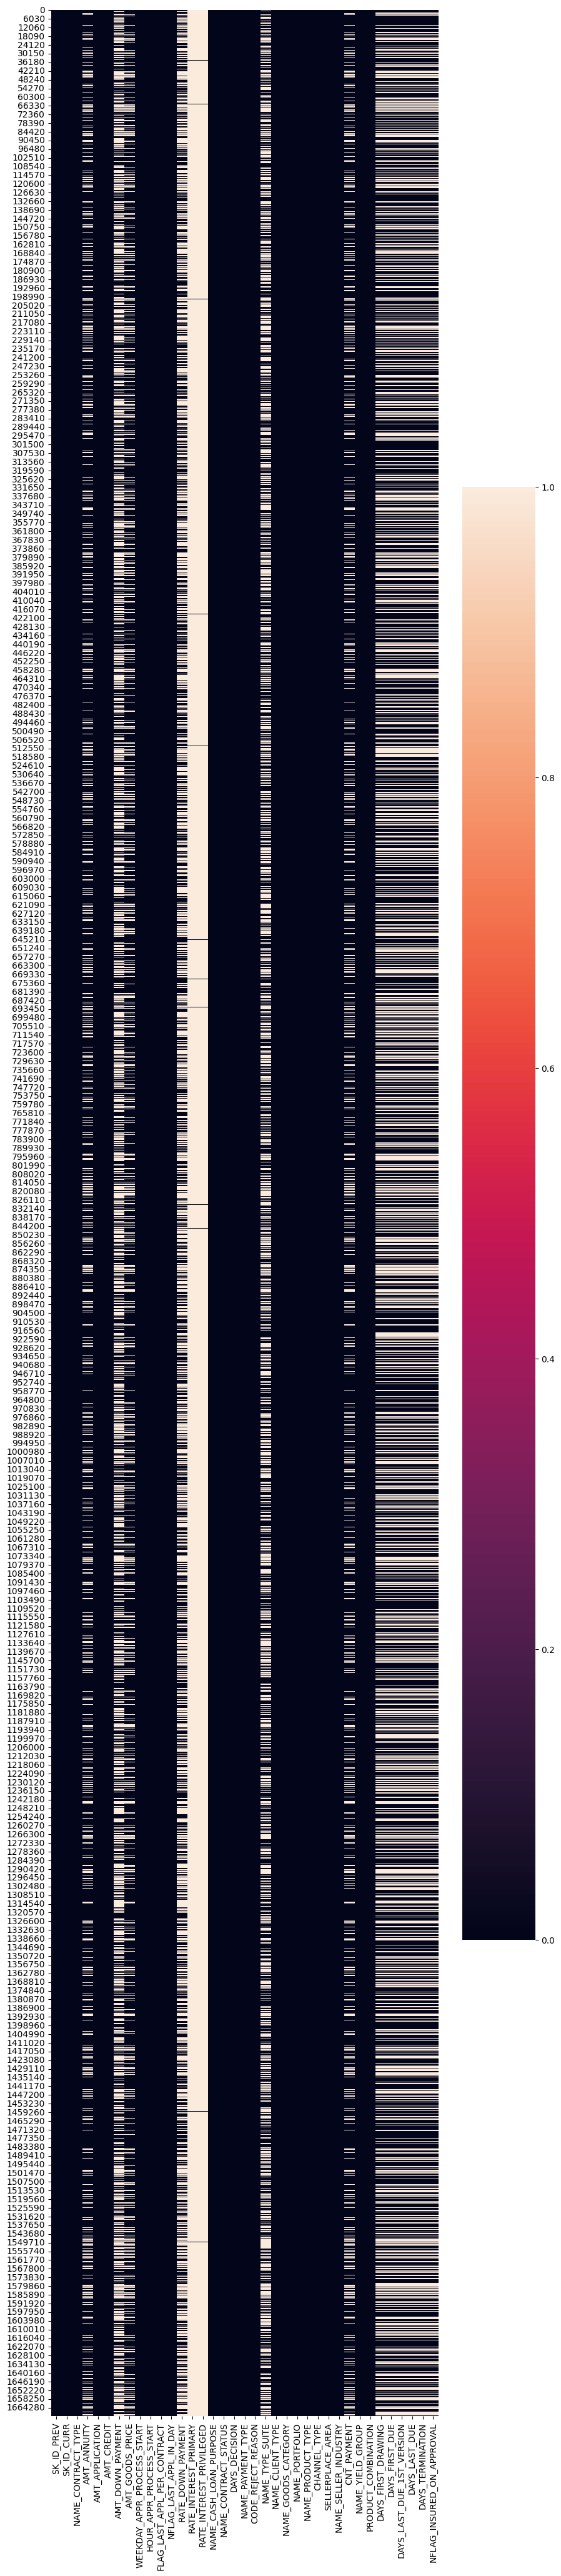

In [121]:
plt.figure(figsize=(10,50))
sns.heatmap(prev.isna())